# Máquinas de soporte vectorial
Las máquinas de soporte vectorial tuvieron su origen como método para la resolución de problemas de clasificación. El primer algoritmo de máquinas de soporte vector fue propuesto por Vapnik en 1963 (Vapnik y Lerner, 1963). El objetivo era construir un algoritmo de clasificación lineal. Es decir, que separasen las distintas clases por una línea o hiperplano.

In [1]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
# really complicated method to generate a dataset
X = np.c_[(.4, -.7),(-1.5,-1),(-1.4,-.9),(-1.3, -1.2),(-1.1,-.2),(-1.2,-.4),(-.5,1.2),(-1.5,2.1),(1,1),(1.3,.8),(1.2,.5),(.2,-2),(.5,-2.4),(.2,-2.3),(0,-2.7),(1.3,2.1)].T
y = [0] * 8 + [1] * 8

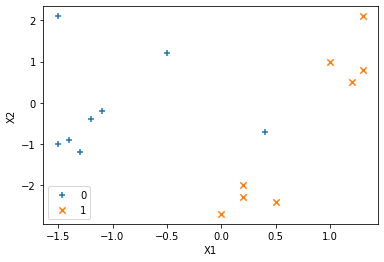

In [3]:
plt.scatter(X[:8][:,0], X[:8][:,1], s=40, label="0", marker="+")
plt.scatter(X[8:][:,0], X[8:][:,1], s=40, label="1", marker="x")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

## Clasificación con SVM y Kernels Varios

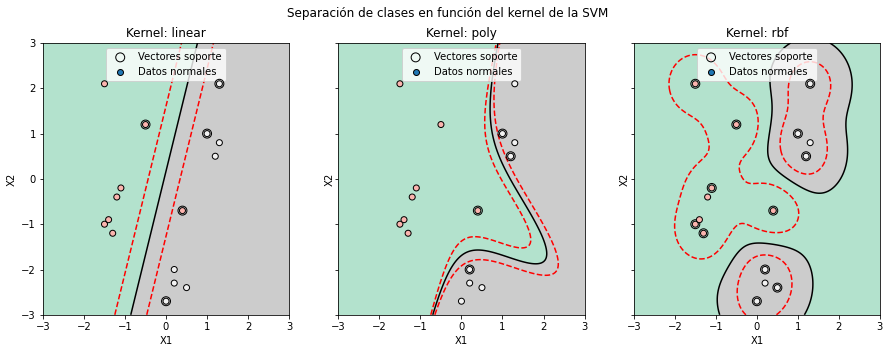

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True)
for ix, kernel in enumerate(['linear', 'poly', 'rbf']):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, y)
    axes[ix].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k', label='Vectores soporte')
    axes[ix].scatter(X[:,0], X[:,1], c=y, zorder=10, cmap=plt.cm.Pastel1, edgecolors='k', label='Datos normales')
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    axes[ix].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Pastel2)
    axes[ix].contour(XX, YY, Z, colors = ['r', 'k', 'r'], linestyles=['--','-','--'], levels=[-0.5,0,0.5])
    axes[ix].legend(loc='upper center')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    axes[ix].set_xlabel("X1")
    axes[ix].set_ylabel("X2")
    axes[ix].set_title('Kernel: {}'.format(kernel))
    fig.suptitle(u'Separación de clases en función del kernel de la SVM')
plt.show()